## Budget Sales Analysis

### Introduction- Internship iNeuron Project

Project Title: __Budget Sales Analysis__

Technologies: __Business Intelligence__

Domain: __Retail & Sales__

By : Dhanshri Manusmare 

### 1. Business Task

To analysis the Budget Sales data, extract necessary information about Customers and Products based on combination of features to help potential buyers purchase the domain they want immediately without the hassle of contacting the seller directly.

### 1.1 Business Objectives

- Performing EDA through Python and find insights.
- Extract various information such as Budget, Sales, Variance. 
- Compare attributes of the dataset to extract necessary information about Products and Customers.
- Make Dashboard with extracted information from data.
- Find key metrics and factors and show relationship between attributes.

### 1.2 Deliverables

1. A clear summary of the business task.
2. A description of dataset used.
3. Documentation of any data cleaning or manipulation.
4. A summary of analysis.
5. Visualizations and Key findings.

### 2. Raw Dataset

The Dataset used was provided in the Project Description Document, iNeuron.

__Database list:__

__AdventureWorks_Database.xlsx__

__Budget.xlsx__


### 2.1 Understanding Dataset

Various Excel files available in the dataset:  __Customer Data__, __Product Data__, __Sales Data__, __Territory Data__, __Budget Data__

Attributes used:

1. __CustomerKey:__ Primary key for customer dataset 

2. __Birthdate:__ Birthdate of the customer 

3. __MaritalStatus:__ M- Married / S - Single 

4. __Gender:__ M – Male / F – Female 

5. __TotalChildren:__ Total number of children 

6. __NumberChildrenAtHome:__ Number of children staying along with their parents 

7. __Education:__ Education qualification 

8. __Occupation:__ Present occupation 

9. __HouseOwnerFlag:__ 1– Owns house / 0- Doesn’t have a permanent address 

10. __NumberCarsOwned:__ Number of cars owned by the customer 

11. __DateFirstPurchase:__ First date of order by the customer

12. __ProductKey:__ Primary Key for the product dataset 

13. __ProductName:__ Product name with colour of the product

14. __Subcategory:__ Sub-category name of the product 

15. __Category:__ Category name of the product 

16. __ListPrice:__ Sale price of the product 

17. __DaysToManufacture:__ Days to manufacture the product after receiving the order 

18. __ProductLine:__ Product line name 

19. __ModelName:__ Model name of the product 

20. __ProductDescription:__ more details about the product 

21. __SalesTerritoryKey:__ Primary Key of the Territory dataset 

22. __Region:__ Region name of the order 

23. __Country:__ Country name of the order 

24. __OrderDate:__ Date of the order received 

25. __ShipDate:__ Date when the order left the factory for export 

26. __SalesOrderNumber:__ Invoice number of the order 

27. __OrderQuantity:__ Number of quantities ordered for a product 

28. __UnitPrice:__ Per unit sale price of the product 

29. __TotalProductCost:__ Cost of the product 

30. __SalesAmount:__ Total sales price of the product 

31. __TaxAmt:__ Tax collected for the product sold

# Import Libraries

In [1]:
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import date

pd.set_option('display.max_columns', None)

# Data Collection

In [2]:
# Open the Excel file
excel_file = pd.ExcelFile('AdventureWorks_Database.xlsx')

# Print sheet names
print(excel_file.sheet_names)

['Calender', 'Customers', 'Product', 'Territory', 'Sales']


#### There are multiple sheets available. So we will execute it one by one :

In [3]:
Calendar=pd.read_excel("AdventureWorks_Database.xlsx", sheet_name="Calender")
Calendar.head()

,Date,DateKey,Year,Quarter,MonthNum,Month,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,MonthYear,MonthYearLong,MonthYearNum,WeekdayNum,Weekday,WeekdayWeekend
0,2016-04-03,20160403,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,1,Sun,Weekend
1,2016-04-04,20160404,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,2,Mon,Weekday
2,2016-04-05,20160405,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,3,Tue,Weekday
3,2016-04-06,20160406,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,4,Wed,Weekday
4,2016-04-07,20160407,2016,Q2,4,Apr,FY2016,FQ4,10,Apr,Apr-16,Apr-2016,201604,5,Thu,Weekday


In [4]:
Customers=pd.read_excel("AdventureWorks_Database.xlsx", sheet_name="Customers")
Customers.head()

,CustomerKey,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance
0,11000,Jon,Yang,"Yang, Jon",1966-04-08,M,M,90000,2,0,Bachelors,Professional,1,0,3761 N. 14th St,2014-01-22,1-2 Miles
1,11001,Eugene,Huang,"Huang, Eugene",1965-05-14,S,M,60000,3,3,Bachelors,Professional,0,1,2243 W St.,2014-01-18,0-1 Miles
2,11002,Ruben,Torres,"Torres, Ruben",1965-08-12,M,M,60000,3,3,Bachelors,Professional,1,1,5844 Linden Land,2014-01-10,2-5 Miles
3,11003,Christy,Zhu,"Zhu, Christy",1968-02-15,S,F,70000,0,0,Bachelors,Professional,0,1,1825 Village Pl.,2014-01-01,5-10 Miles
4,11004,Elizabeth,Johnson,"Johnson, Elizabeth",1968-08-08,S,F,80000,5,5,Bachelors,Professional,1,4,7553 Harness Circle,2014-01-26,1-2 Miles


In [5]:
Product=pd.read_excel("AdventureWorks_Database.xlsx", sheet_name="Product")
Product.head()

,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate
0,212,"Sport-100 Helmet, Red",Helmets,Accessories,12.0278,Red,33.6442,0,Sport,Sport-100,http://www.avising.com/me/LearnPBI/DataSources...,"Universal fit, well-vented, lightweight , snap...",2005-07-01
1,213,"Sport-100 Helmet, Red",Helmets,Accessories,13.8782,Red,33.6442,0,Sport,Sport-100,http://www.avising.com/me/LearnPBI/DataSources...,"Universal fit, well-vented, lightweight , snap...",2006-07-01
2,214,"Sport-100 Helmet, Red",Helmets,Accessories,13.0863,Red,34.9900,0,Sport,Sport-100,http://www.avising.com/me/LearnPBI/DataSources...,"Universal fit, well-vented, lightweight , snap...",2007-07-01
3,215,"Sport-100 Helmet, Black",Helmets,Accessories,12.0278,Black,33.6442,0,Sport,Sport-100,http://www.avising.com/me/LearnPBI/DataSources...,"Universal fit, well-vented, lightweight , snap...",2005-07-01
4,216,"Sport-100 Helmet, Black",Helmets,Accessories,13.8782,Black,33.6442,0,Sport,Sport-100,http://www.avising.com/me/LearnPBI/DataSources...,"Universal fit, well-vented, lightweight , snap...",2006-07-01


In [6]:
Sales=pd.read_excel("AdventureWorks_Database.xlsx", sheet_name="Sales")
Sales.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.2700,286.2616
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,1912.1544,3399.9900,271.9992
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,1912.1544,3399.9900,271.9992
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,413.1463,699.0982,55.9279
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,1912.1544,3399.9900,271.9992


In [7]:
Territory=pd.read_excel("AdventureWorks_Database.xlsx", sheet_name="Territory")
Territory.head()

,SalesTerritoryKey,Region,Country,Group,RegionImage
0,1,Northwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,2,Northeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,3,Central,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,4,Southwest,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,5,Southeast,United States,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [8]:
# Checking Column Names of all Datasets
print('Date Columns:', Calendar.columns)
print('Customer Columns:', Customers.columns)
print('Product Columns:', Product.columns)
print('Sales Columns:', Sales.columns)
print('Territory Columns:', Territory.columns)

Date Columns: Index(['Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday',
       'WeekdayWeekend'],
      dtype='object')
Customer Columns: Index(['CustomerKey', 'FirstName', 'LastName', 'FullName', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase',
       'CommuteDistance'],
      dtype='object')
Product Columns: Index(['ProductKey', 'ProductName', 'SubCategory', 'Category', 'StandardCost',
       'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName',
       'Photo', 'ProductDescription', 'StartDate'],
      dtype='object')
Sales Columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrde

# Merging Data

In [9]:
# Merging Customer and Sales Data
Merged_df = pd.merge(Sales, Customers, on = 'CustomerKey', how = 'inner')
# Merging Product Data
Merged_df = pd.merge(Merged_df, Product, on = 'ProductKey', how = 'inner')
# Merging Territory Data
Merged_df = pd.merge(Merged_df, Territory, on = 'SalesTerritoryKey', how = 'inner')
# Displaying Merged Data
Merged_df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-02-23,2014-02-28,21921,1,6,SO44027,1,1,3578.2700,2171.2942,3578.27,286.2616,Lucas,Collins,"Collins, Lucas",1961-08-02,M,M,60000,1,0,Partial College,Skilled Manual,1,1,8108 Abbey Court,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,310,2014-02-28,2014-03-06,22050,1,6,SO44064,1,1,3578.2700,2171.2942,3578.27,286.2616,Richard,Bailey,"Bailey, Richard",1968-02-18,S,M,90000,4,4,Bachelors,Management,1,1,5826 Limewood Pl.,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,310,2014-05-18,2014-05-25,22233,1,6,SO44677,1,2,1789.1350,2171.2942,3578.27,286.2616,Xavier,Martin,"Martin, Xavier",1972-04-22,M,M,50000,1,1,Graduate Degree,Skilled Manual,1,0,4539 Leeds Ct,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,Red,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


# Data Information

In [10]:
# Checking Data Types
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  FirstName       

In [11]:
# Checking Shape
Merged_df.shape

(58189, 45)

In [12]:
# Checking Duplicate Value
Merged_df.duplicated().sum()

0

In [13]:
# Checking Missing Values
Merged_df.isnull().sum()

ProductKey                  0
OrderDate                   0
ShipDate                    0
CustomerKey                 0
PromotionKey                0
SalesTerritoryKey           0
SalesOrderNumber            0
SalesOrderLineNumber        0
OrderQuantity               0
UnitPrice                   0
TotalProductCost            0
SalesAmount                 0
TaxAmt                      0
FirstName                   0
LastName                    0
FullName                    0
BirthDate                   0
MaritalStatus               0
Gender                      0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
Education                   0
Occupation                  0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
DateFirstPurchase           0
CommuteDistance             0
ProductName                 0
SubCategory                 0
Category                    0
StandardCost                0
Color     

In [14]:
# Dropping Column with Missing data
Merged_df = Merged_df.drop('Color', axis = 1)

In [15]:
# Checking the Shape
Merged_df.shape

(58189, 44)

In [16]:
Merged_df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FirstName,LastName,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,DaysToManufacture,ProductLine,ModelName,Photo,ProductDescription,StartDate,Region,Country,Group,RegionImage
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,Cole,Watson,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,601 Asilomar Dr.,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
1,310,2014-01-30,2014-02-06,21727,1,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,Arianna,Flores,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,4082 Shell Ct,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
2,310,2014-02-23,2014-02-28,21921,1,6,SO44027,1,1,3578.2700,2171.2942,3578.27,286.2616,Lucas,Collins,"Collins, Lucas",1961-08-02,M,M,60000,1,0,Partial College,Skilled Manual,1,1,8108 Abbey Court,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
3,310,2014-02-28,2014-03-06,22050,1,6,SO44064,1,1,3578.2700,2171.2942,3578.27,286.2616,Richard,Bailey,"Bailey, Richard",1968-02-18,S,M,90000,4,4,Bachelors,Management,1,1,5826 Limewood Pl.,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...
4,310,2014-05-18,2014-05-25,22233,1,6,SO44677,1,2,1789.1350,2171.2942,3578.27,286.2616,Xavier,Martin,"Martin, Xavier",1972-04-22,M,M,50000,1,1,Graduate Degree,Skilled Manual,1,0,4539 Leeds Ct,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,4,Road,Road-150,http://www.avising.com/me/LearnPBI/DataSources...,This bike is ridden by race winners. Developed...,2005-07-01,Canada,Canada,North America,http://www.avising.com/me/LearnPBI/DataSources...


In [17]:
print('Columns:', Merged_df.columns)

Columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'FirstName', 'LastName', 'FullName', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase',
       'CommuteDistance', 'ProductName', 'SubCategory', 'Category',
       'StandardCost', 'ListPrice', 'DaysToManufacture', 'ProductLine',
       'ModelName', 'Photo', 'ProductDescription', 'StartDate', 'Region',
       'Country', 'Group', 'RegionImage'],
      dtype='object')


# PANDAS PROFILE REPORT

In [18]:
#from pandas_profiling import ProfileReport

In [1]:
#profile=ProfileReport(new_df,title="pandas profile report")

In [21]:
#profile.to_widgets()

# Data Cleaning

#### Dropping Not Required Columns

In [22]:
columns_to_drop = [ 'FirstName', 'LastName', 'AddressLine1', 'DaysToManufacture', 'Photo', 'ProductDescription', 'PromotionKey','Group', 'RegionImage']
new_df = Merged_df.drop(columns=columns_to_drop)
new_df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,ProductLine,ModelName,StartDate,Region,Country
0,310,2014-01-01,2014-01-08,21768,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada
1,310,2014-01-30,2014-02-06,21727,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada
2,310,2014-02-23,2014-02-28,21921,6,SO44027,1,1,3578.2700,2171.2942,3578.27,286.2616,"Collins, Lucas",1961-08-02,M,M,60000,1,0,Partial College,Skilled Manual,1,1,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada
3,310,2014-02-28,2014-03-06,22050,6,SO44064,1,1,3578.2700,2171.2942,3578.27,286.2616,"Bailey, Richard",1968-02-18,S,M,90000,4,4,Bachelors,Management,1,1,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada
4,310,2014-05-18,2014-05-25,22233,6,SO44677,1,2,1789.1350,2171.2942,3578.27,286.2616,"Martin, Xavier",1972-04-22,M,M,50000,1,1,Graduate Degree,Skilled Manual,1,0,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada


In [23]:
print('Columns:', new_df.columns)

Columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education',
       'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'DateFirstPurchase',
       'CommuteDistance', 'ProductName', 'SubCategory', 'Category',
       'StandardCost', 'ListPrice', 'ProductLine', 'ModelName', 'StartDate',
       'Region', 'Country'],
      dtype='object')


In [24]:
new_df.shape

(58189, 35)

In [25]:
new_df.dtypes

ProductKey                       int64
OrderDate               datetime64[ns]
ShipDate                datetime64[ns]
CustomerKey                      int64
SalesTerritoryKey                int64
SalesOrderNumber                object
SalesOrderLineNumber             int64
OrderQuantity                    int64
UnitPrice                      float64
TotalProductCost               float64
SalesAmount                    float64
TaxAmt                         float64
FullName                        object
BirthDate               datetime64[ns]
MaritalStatus                   object
Gender                          object
YearlyIncome                     int64
TotalChildren                    int64
NumberChildrenAtHome             int64
Education                       object
Occupation                      object
HouseOwnerFlag                   int64
NumberCarsOwned                  int64
DateFirstPurchase       datetime64[ns]
CommuteDistance                 object
ProductName              

### Describing the basic statistics of the data.

In [26]:
new_df.describe()

,ProductKey,CustomerKey,SalesTerritoryKey,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,StandardCost,ListPrice
count,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000,58189.000000
mean,437.208304,18853.004640,6.261716,1.887453,1.569386,413.888218,296.539185,503.666270,40.293303,59769.887779,1.838921,1.073502,0.690560,1.502466,296.539185,503.666270
std,118.099746,5433.374315,2.960248,1.018829,1.047532,833.052938,560.171436,941.462817,75.317027,33128.041818,1.614467,1.580055,0.462267,1.155496,560.171436,941.462817
min,214.000000,11000.000000,1.000000,1.000000,1.000000,0.572500,0.856500,2.290000,0.183200,10000.000000,0.000000,0.000000,0.000000,0.000000,0.856500,2.290000
25%,358.000000,14012.000000,4.000000,1.000000,1.000000,4.990000,3.362300,8.990000,0.719200,30000.000000,0.000000,0.000000,0.000000,1.000000,3.362300,8.990000
50%,479.000000,18151.000000,7.000000,2.000000,1.000000,24.490000,12.192400,32.600000,2.608000,60000.000000,2.000000,0.000000,1.000000,2.000000,12.192400,32.600000
75%,529.000000,23450.000000,9.000000,2.000000,2.000000,269.995000,343.649600,539.990000,43.199200,80000.000000,3.000000,2.000000,1.000000,2.000000,343.649600,539.990000
max,606.000000,29483.000000,10.000000,8.000000,4.000000,3578.270000,2171.294200,3578.270000,286.261600,170000.000000,5.000000,5.000000,1.000000,4.000000,2171.294200,3578.270000


### Checking Unique Values

In [27]:
# Education Count
new_df.Education.value_counts()

Bachelors              17602
Partial College        15985
Graduate Degree        10231
High School             9865
Partial High School     4506
Name: Education, dtype: int64

In [28]:
# Occupation Count
new_df.Occupation.value_counts()

Professional      18358
Skilled Manual    13636
Management        10175
Clerical           9315
Manual             6705
Name: Occupation, dtype: int64

In [29]:
# Category Count
new_df.Category.value_counts()

Accessories    34319
Bikes          15205
Clothing        8665
Name: Category, dtype: int64

In [30]:
# Sub_Category Count
new_df.SubCategory.value_counts()

Tires and Tubes      16299
Road Bikes            8068
Bottles and Cages     7719
Helmets               6171
Mountain Bikes        4970
Jerseys               3179
Touring Bikes         2167
Caps                  2095
Fenders               2014
Gloves                1363
Shorts                 958
Cleaners               864
Hydration Packs        706
Socks                  543
Vests                  527
Bike Racks             308
Bike Stands            238
Name: SubCategory, dtype: int64

In [31]:
# Sub_Category Count
new_df.Country.value_counts()

United States     20524
Australia         12972
Canada             7142
United Kingdom     6709
Germany            5460
France             5382
Name: Country, dtype: int64

### Adding new columns that required

In [32]:
# Extracting year from OrderDate
new_df['Sale_year'] = new_df['OrderDate'].dt.year

In [33]:
# Extracting month from OrderDate
new_df['Sale_month'] = new_df['OrderDate'].dt.month

In [34]:
# Extracting day from OrderDate
new_df['Sale_day'] = new_df['OrderDate'].dt.day

In [35]:
# Extracting day_of_week from OrderDate
new_df['Sale_week'] = new_df['OrderDate'].dt.dayofweek

In [36]:
# Extracting day_of_week from OrderDate
new_df['Sale_day_name'] = new_df['OrderDate'].dt.day_name()

### Calculating Total Amount and Profit

In [37]:
new_df['Total_Amount'] = new_df['SalesAmount'] + new_df['TaxAmt']
new_df['Profit'] = (new_df['UnitPrice'] * new_df['OrderQuantity']) - new_df['TotalProductCost']

### Calculating Age of the customer

In [38]:
new_df['Age'] = new_df['OrderDate'].dt.year - new_df['BirthDate'].dt.year

In [39]:
def age_group(i):
    if i >= 10 and i < 40:
        return 'Young Age'
    elif i >= 40 and i < 60:
        return 'Middle Age'
    elif i > 60:
        return 'Old Age'

### Adding Age Group Column to the dataset

In [40]:
new_df['Age_Group'] = new_df['Age'].apply(age_group)
new_df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,ProductLine,ModelName,StartDate,Region,Country,Sale_year,Sale_month,Sale_day,Sale_week,Sale_day_name,Total_Amount,Profit,Age,Age_Group
0,310,2014-01-01,2014-01-08,21768,6,SO43697,1,2,1789.1350,2171.2942,3578.27,286.2616,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada,2014,1,1,2,Wednesday,3864.5316,1406.9758,68,Old Age
1,310,2014-01-30,2014-02-06,21727,6,SO43833,1,4,894.5675,2171.2942,3578.27,286.2616,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada,2014,1,30,3,Thursday,3864.5316,1406.9758,41,Middle Age
2,310,2014-02-23,2014-02-28,21921,6,SO44027,1,1,3578.2700,2171.2942,3578.27,286.2616,"Collins, Lucas",1961-08-02,M,M,60000,1,0,Partial College,Skilled Manual,1,1,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada,2014,2,23,6,Sunday,3864.5316,1406.9758,53,Middle Age
3,310,2014-02-28,2014-03-06,22050,6,SO44064,1,1,3578.2700,2171.2942,3578.27,286.2616,"Bailey, Richard",1968-02-18,S,M,90000,4,4,Bachelors,Management,1,1,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada,2014,2,28,4,Friday,3864.5316,1406.9758,46,Middle Age
4,310,2014-05-18,2014-05-25,22233,6,SO44677,1,2,1789.1350,2171.2942,3578.27,286.2616,"Martin, Xavier",1972-04-22,M,M,50000,1,1,Graduate Degree,Skilled Manual,1,0,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.27,Road,Road-150,2005-07-01,Canada,Canada,2014,5,18,6,Sunday,3864.5316,1406.9758,42,Middle Age


In [41]:
new_df.shape

(58189, 44)

# Exploring Data Analysis

### CUSTOMER ANALYSIS

#### Customer Distribution by Gender

<Axes: ylabel='CustomerKey'>

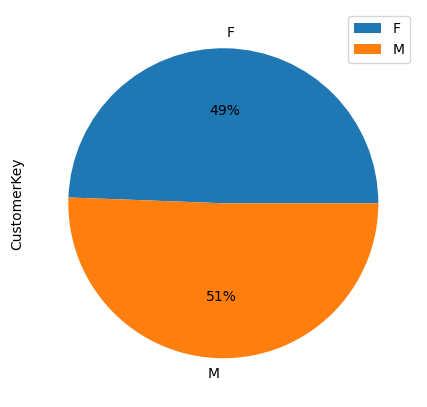

In [42]:
new_df.groupby(['Gender']).sum().plot(kind='pie', y='CustomerKey', autopct='%1.0f%%',figsize=(5,7))

- Male and Female customers are almost equal

#### Customer Distribution by Marital Status

<Axes: ylabel='CustomerKey'>

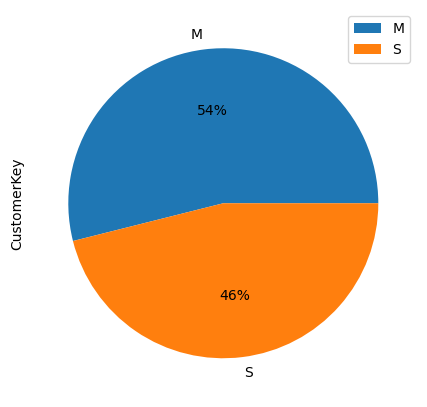

In [43]:
new_df.groupby(['MaritalStatus']).sum().plot(kind='pie', y='CustomerKey', autopct='%1.0f%%',figsize=(5,7))

- Married Customer are more than Single Customers

#### Customer Distribution by Education 

<Axes: ylabel='Education'>

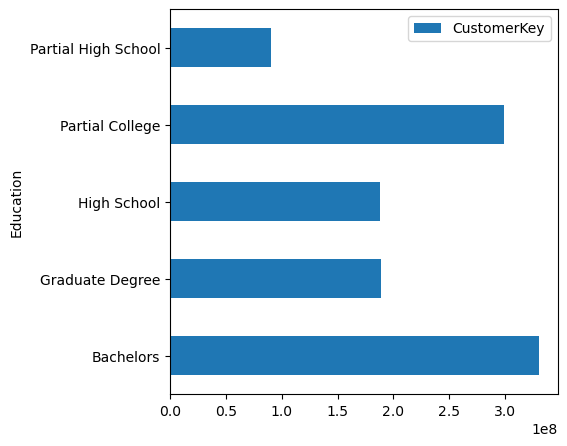

In [44]:
new_df.groupby(['Education']).sum().plot(kind='barh', y='CustomerKey',figsize=(5,5))

- Most of the Customers education is Bachelors or Partial College education

#### Customer Distribution by Occupation

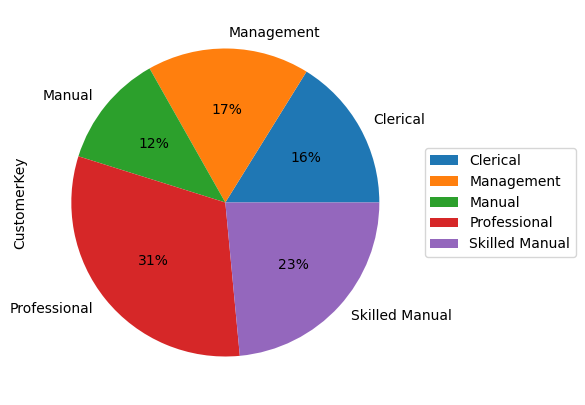

In [45]:
pie_chart = new_df.groupby(['Occupation']).sum().plot(kind='pie', y='CustomerKey', autopct='%1.0f%%', figsize=(5, 5))

# Move the legend outside of the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

- Most of the Customers are from Professional, Skilled Manual and Management occupations

#### Customer Distribution by Age

<Axes: xlabel='Age_Group'>

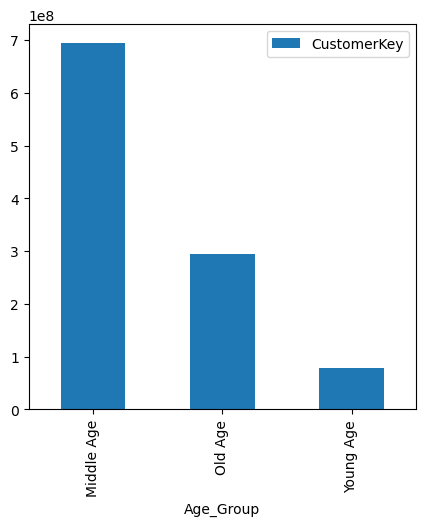

In [46]:
new_df.groupby(['Age_Group']).sum().plot(kind='bar', y='CustomerKey',figsize=(5,5))

- Most of the customers belong to middle age group i.e. 40-60 years

#### Customer Distribution By Yearly_Income

<Axes: xlabel='YearlyIncome'>

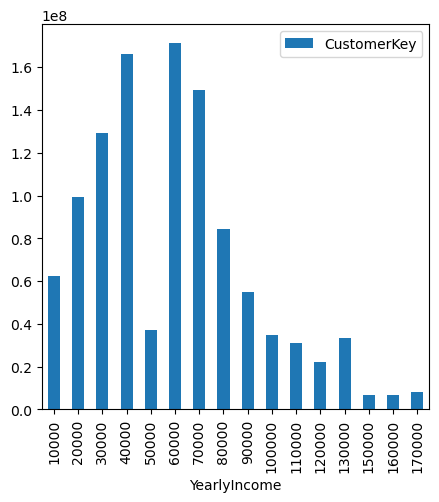

In [47]:
new_df.groupby(['YearlyIncome']).sum().plot(kind='bar', y='CustomerKey', figsize=(5,5))

- Most of the Customers YearlyIncome is below 100K
- There are more customers in YearlyIncome Between 10K-40K and 60K-70K

#### Customer Distribution By Distance

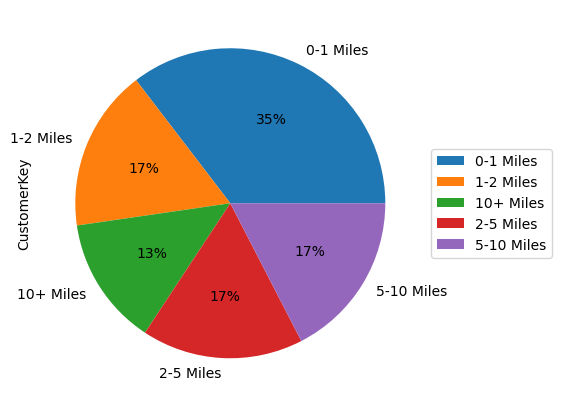

In [48]:
new_df.groupby(['CommuteDistance']).sum().plot(kind='pie', y='CustomerKey', autopct='%1.0f%%',figsize=(5,7))

# Move the legend outside of the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

- Most of the customer are from nearly location where distance is in between 0 - 1 miles

#### Customer Distribution By Country

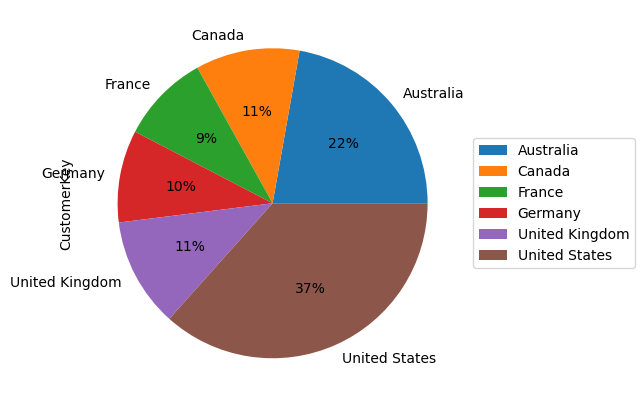

In [49]:
new_df.groupby(['Country']).sum().plot(kind='pie', y='CustomerKey', autopct='%1.0f%%',figsize=(5,7))
# Move the legend outside of the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

- Here we clear see that most of the customer are for United State followed by Austalia

## SALES ANALYSIS

#### Average Price Per Unit of Product

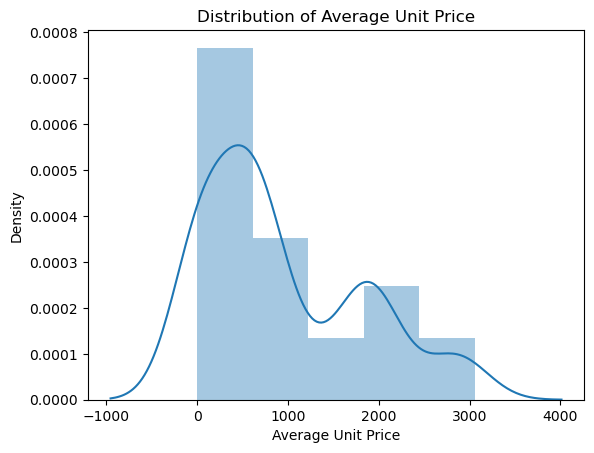

In [50]:
avg_unit_price = new_df.groupby(['ProductKey'])['UnitPrice'].mean()

sns.distplot(avg_unit_price, kde=True, hist=True)
plt.title('Distribution of Average Unit Price')
plt.xlabel('Average Unit Price')
plt.show()

- Maximum product unit price is below 1000

#### Customer(order number) distribution

In [51]:
# Calculate the number of unique sales orders per customer
n_orders = new_df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()

# Calculate the percentage of customers who ordered more than once
multi_orders_perc = (n_orders > 1).sum() / len(new_df['CustomerKey'].unique()) * 100

# Print the percentage
print(f"{multi_orders_perc:.2f}% of customers ordered more than once.")


36.97% of customers ordered more than once.


- 36.97% of customers ordered more than once.

#### Distribution of Order Quantity

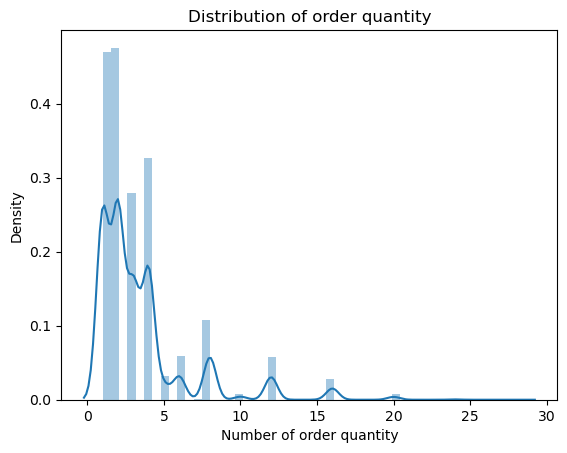

In [52]:
# Calculate the total order quantity per sales order
order_quantity = new_df.groupby(['SalesOrderNumber'])['OrderQuantity'].sum()

# Plot the distribution of order quantities
sns.distplot(order_quantity, kde=True, hist=True)
plt.title('Distribution of order quantity')
plt.xlabel('Number of order quantity')
plt.show()

- Maximum number of quantity ordered is below 5.

#### Distribution of Sales Order Line Number

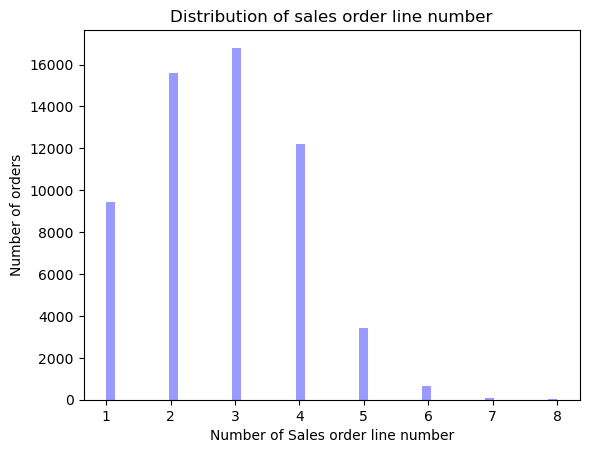

In [53]:
# Calculate the maximum sales order line number for each sales order
n_salesordernumber = new_df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max')

sns.distplot(n_salesordernumber, kde=False, color='blue')
plt.title('Distribution of sales order line number')
plt.xlabel('Number of Sales order line number')
plt.ylabel('Number of orders')
plt.show()

- In single order maximun 2 to 3 products are ordered

NOTE : Order Line means number of product order in single placed order

#### Sales Distribution By Year

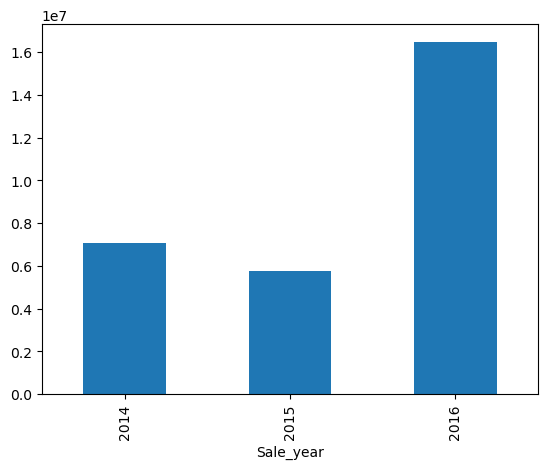

In [54]:
new_df.groupby('Sale_year')['SalesAmount'].sum().plot(kind='bar');

- The year 2016 saw an rapid growth in sales

#### Sales By Category

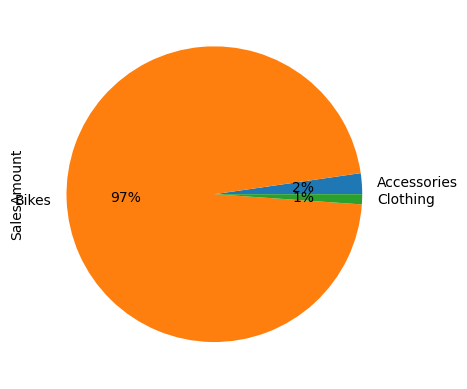

In [55]:
new_df.groupby('Category')['SalesAmount'].sum().plot(kind='pie',autopct='%0.0f%%');

- 96.6% sales are from Bikes category

#### Sales By Sub Category

<Axes: xlabel='SubCategory'>

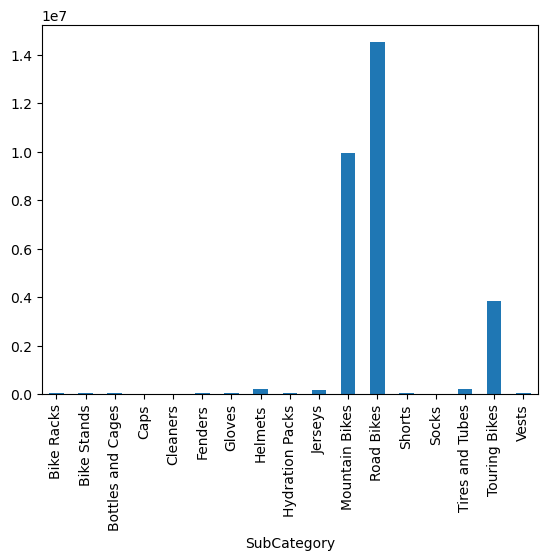

In [56]:
new_df.groupby('SubCategory')['SalesAmount'].sum().plot(kind='bar')

- Here three sub category gives more sales are Road Bikes followed by Mountain Bikes and Touring Bikes

#### Sales By Age Group

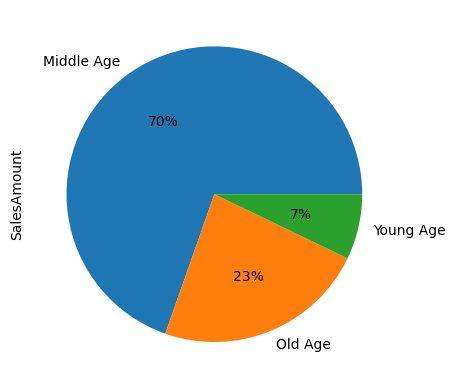

In [57]:
new_df.groupby('Age_Group')['SalesAmount'].sum().plot(kind='pie',autopct='%0.0f%%');

- Middle Age group create more sales than other

## Top 5 Selling Product

In [58]:
top_selling_prod = new_df.groupby(['Category', 'SubCategory', 'ProductName'])['OrderQuantity'].sum().nlargest(5).to_frame()
top_selling_prod

OrderQuantity
Category    SubCategory       ProductName                         
Accessories Bottles and Cages Water Bottle - 30 oz.           6370
            Tires and Tubes   Patch Kit/8 Patches             4705
                              Mountain Tire Tube              4551
                              Road Tire Tube                  3544
            Helmets           Sport-100 Helmet, Red           3398

## Quantity Ordered based on Category and Subcategory from 2014 to 2016

In [59]:
order_qty = new_df.groupby(['Sale_year','Category', 'SubCategory'])['OrderQuantity'].sum().to_frame()
order_qty = order_qty.sort_values(['Sale_year', 'Category'], ascending=True)
order_qty.style.bar(subset=['OrderQuantity'], color='#D9B300')

## Quantity Ordered by Country

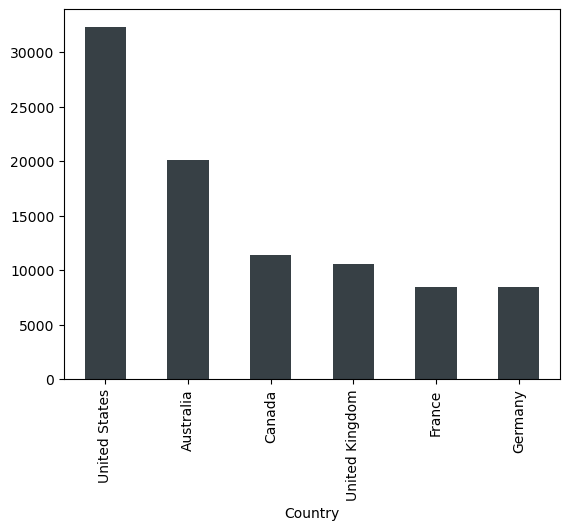

In [60]:
country_qty = new_df.groupby('Country')['OrderQuantity'].sum().sort_values(ascending=False)
country_qty.plot(kind='bar', color='#374045');

- High quantity of products is ordered from **Australia and United States**

## PROFIT ANALYSIS

### Overall Profit based on Order Year, Category and Subcategory

In [61]:
profit = new_df.groupby(['Sale_year','Category', 'SubCategory'])['Profit'].sum().to_frame()

#Sorting the results
profit = profit.sort_values(['Sale_year', 'Category'], ascending=True)
profit.style.bar(subset=['Profit'], color='#62dee7')

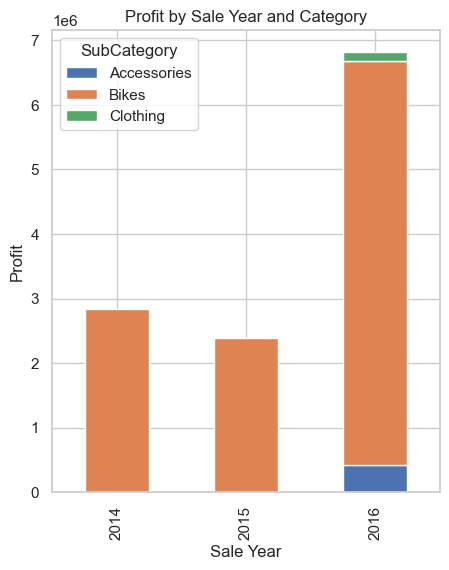

In [62]:
# Create a pivot table to aggregate profits by Sale_year and Category
pivot_data = new_df.pivot_table(index='Sale_year', columns='Category', values='Profit', aggfunc='sum')

# Plot stacked bar plot
sns.set(style='whitegrid')
pivot_data.plot(kind='bar', stacked=True, figsize=(5, 6))
plt.xlabel('Sale Year')
plt.ylabel('Profit')
plt.title('Profit by Sale Year and Category')
plt.legend(title='SubCategory')
plt.show()

- Major Profit is contributed by the Bike Category

## Low Profit Product

In [63]:
new_df.groupby(['Category', 'SubCategory','ProductName'])['Profit'].sum().nsmallest(10).to_frame()

Profit
Category    SubCategory     ProductName                              
Clothing    Socks           Racing Socks, L                 1474.4574
                            Racing Socks, M                 1581.3837
Accessories Cleaners        Bike Wash - Dissolver           4299.8688
            Tires and Tubes Patch Kit/8 Patches             4314.8350
Clothing    Caps            AWC Logo Cap                    4331.8315
Accessories Tires and Tubes Touring Tire Tube               4363.8089
Clothing    Jerseys         Long-Sleeve Logo Jersey, XL     4495.6007
                            Short-Sleeve Classic Jersey, L  4544.8782
                            Long-Sleeve Logo Jersey, S      4610.5777
                            Short-Sleeve Classic Jersey, M  4793.2322

### Profit by Country

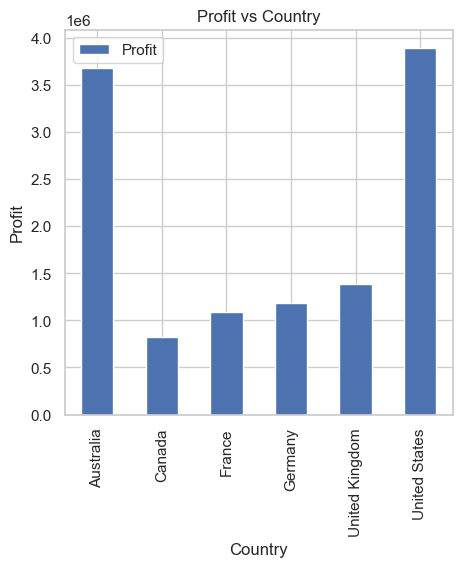

In [64]:
country_sales = new_df.groupby('Country').sum()[['SalesAmount', 'Profit']]
country_sales.plot(kind='bar', y='Profit', figsize=(5, 5))
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Profit vs Country')
plt.show()

- High volume of profit is earned from **Australia and United States**

### Profit by Category

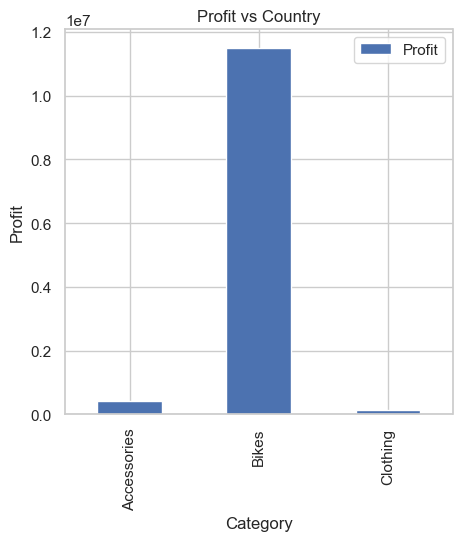

In [65]:
cat_sales = new_df.groupby('Category').sum()[['SalesAmount', 'Profit']]
cat_sales.plot(kind='bar', y='Profit', figsize=(5, 5))
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit vs Country')
plt.show()

- High volume of profit is earned from Bikes

### Monthly Sales Profit &  Best Months for Sales

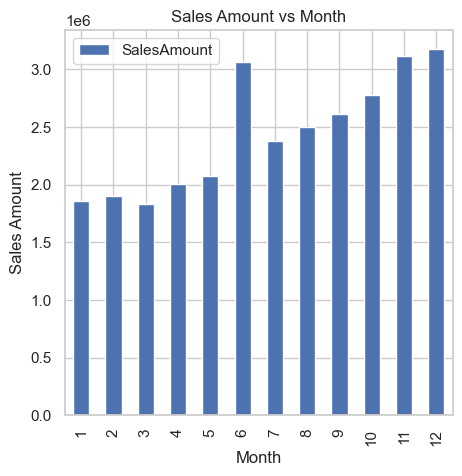

In [66]:
month_sales = new_df.groupby('Sale_month').sum()[['SalesAmount', 'Profit']]
month_sales.reset_index(inplace=True)
month_sales.plot(kind='bar', x='Sale_month', y='SalesAmount', figsize=(5, 5))
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Sales Amount vs Month')
plt.show()

- There are large profit transactions in the months of June, November, and December

### Maximum Sales By Weekday

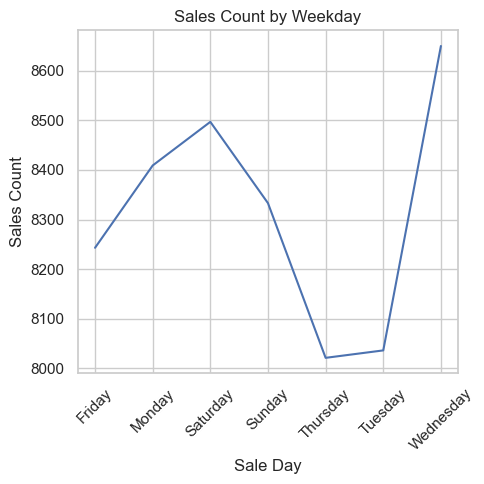

In [67]:
sales_by_week = new_df['SalesAmount'].groupby(new_df['Sale_day_name']).count()
sales_by_week.plot(kind='line', figsize=(5, 5))
plt.xlabel('Sale Day')
plt.ylabel('Sales Count')
plt.title('Sales Count by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- High sales orders are seen on **Wednesday and Saturday**, therefore we can promote our product during these days

### Which products are most often sold together?

In [68]:
from itertools import combinations
from collections import Counter

# Find rows with duplicate SalesOrderNumber
dup_order = new_df[new_df['SalesOrderNumber'].duplicated(keep=False)]

# Group by SalesOrderNumber and concatenate ProductName
dup_order['grouped'] = new_df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))

# Drop duplicate combinations
dup_order = dup_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

# Count combinations and plot the top 5
count = Counter()
for row in dup_order['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Print the top 10 combinations
for key, value in count.most_common(10):
    print(key, value)


('Sport-100 Helmet', ' Red') 2092
('Sport-100 Helmet', ' Blue') 1981
('Sport-100 Helmet', ' Black') 1935
('Water Bottle - 30 oz.', 'Mountain Bottle Cage') 1623
('Water Bottle - 30 oz.', 'Road Bottle Cage') 1513
('Mountain Tire Tube', 'Sport-100 Helmet') 1240
('Water Bottle - 30 oz.', 'Sport-100 Helmet') 1056
('Mountain Tire Tube', 'HL Mountain Tire') 915
('Sport-100 Helmet', 'Road Tire Tube') 815
('Touring Tire', 'Touring Tire Tube') 758


In [69]:
# By setting keep on False, all duplicates are True since we only want repeated order number

dup_order = new_df[new_df['SalesOrderNumber'].duplicated(keep=False)]

In [70]:
# Group the data based on sales order number and product name because the products
# that bought together will have share same order number
dup_order['grouped'] = new_df.groupby('SalesOrderNumber')['ProductName'].transform(lambda x: ','.join(x))
dup_order = dup_order[['SalesOrderNumber', 'grouped']].drop_duplicates()

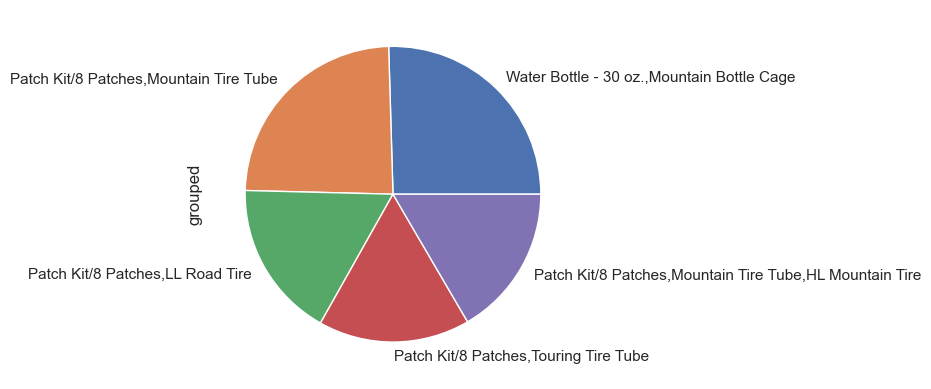

In [71]:
count = dup_order['grouped'].value_counts()[0:5].plot.pie()

- From the above pie diagram we can draw a conclusion that these products are mostly Purchased together
- The above product can be sold in a bundle or a combined package for discount

### Which product sold the most? why do you think it sold the most?

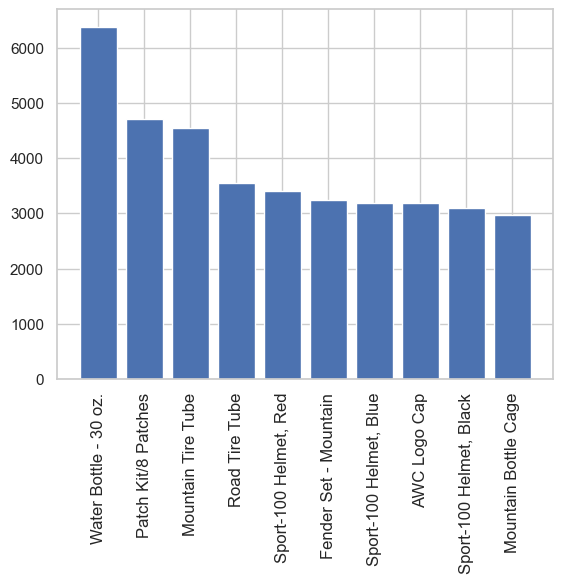

In [72]:
product_group = new_df.groupby('ProductName')
quantity_ordered = product_group['OrderQuantity'].sum().sort_values(ascending=False)[:10]
products = quantity_ordered.index.tolist()

plt.bar(products, quantity_ordered, )
plt.xticks(products, rotation='vertical', size=12)
plt.show()

In [73]:
prices = new_df.groupby('ProductName').mean()['UnitPrice']
prices = prices[products]

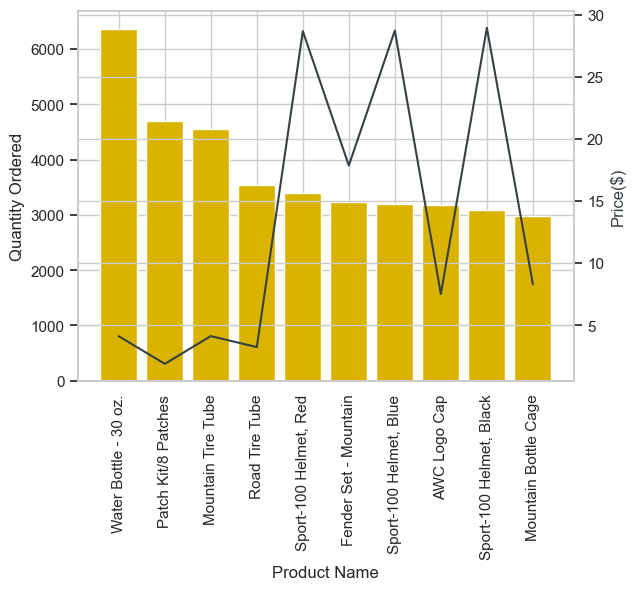

In [74]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='#D9B300')
ax2.plot(products, prices, '#374045')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price($)', color='#374045')
ax1.set_xticklabels(products, rotation='vertical')

plt.show();

In [75]:
prices.corr(quantity_ordered)

-0.5333019792658484

- There is a **high negative correlation** between **Price and number of Quantity ordered**
- we can conclude that **low price product has high demand**

### Compare Most Ordered Product By Gender

In [76]:
male = new_df[new_df["Gender"]=="M"]
female = new_df[new_df["Gender"]=="F"]

In [77]:
male_ord = male.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
male_ord.columns=['ProductName','Order_Qty_Male']

female_ord = female.groupby(['ProductName'],as_index=False)['OrderQuantity'].sum().nlargest(5,'OrderQuantity').sort_values('ProductName')
female_ord.columns=['ProductName','Order_Qty_Female']

df_merge = pd.merge(male_ord, female_ord, on='ProductName')

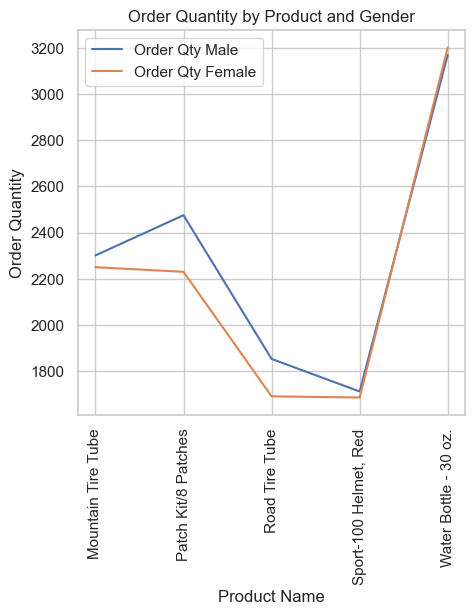

In [78]:
plt.figure(figsize=(5, 5))
plt.plot(df_merge['ProductName'], df_merge['Order_Qty_Male'], label='Order Qty Male')
plt.plot(df_merge['ProductName'], df_merge['Order_Qty_Female'], label='Order Qty Female')
plt.xlabel('Product Name')
plt.ylabel('Order Quantity')
plt.title('Order Quantity by Product and Gender')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

- Most order product in male and female is same that is Water Bottle - 30 oz

### Does Gender and Home Ownership Matter in Order Purchasing

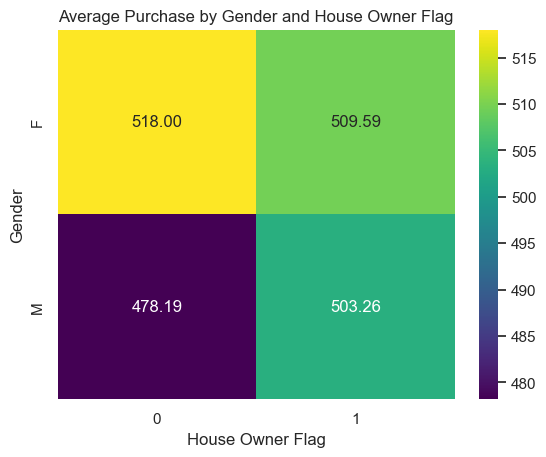

In [79]:
# Grouping by 'Gender' and 'HouseOwnerFlag' and calculating the mean of 'SalesAmount'
mean_sales = new_df.groupby(["Gender", "HouseOwnerFlag"])["SalesAmount"].mean().unstack()
sns.heatmap(mean_sales, cmap='viridis', annot=True, fmt=".2f")
plt.xlabel('House Owner Flag')
plt.ylabel('Gender')
plt.title('Average Purchase by Gender and House Owner Flag')
plt.show()

- It's interesting to note that the average amount spent by men without permanent addresses is low, while the average amount spent by women without permanent addresses is higher.

### Number of childer and Purchase correlation

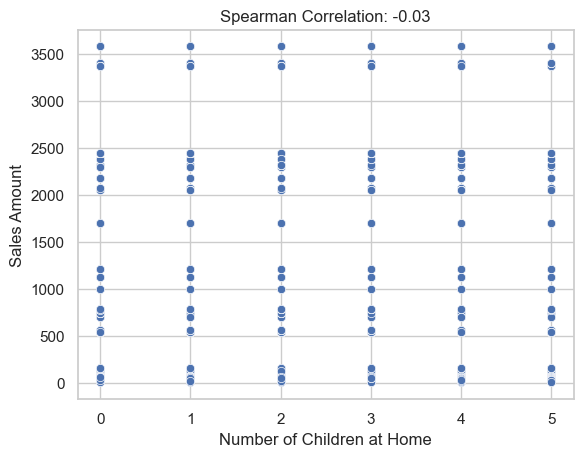

In [80]:
# Calculate Spearman correlation coefficient
correlation = new_df['NumberChildrenAtHome'].corr(new_df['SalesAmount'], method='spearman')
sns.scatterplot(data=new_df, x='NumberChildrenAtHome', y='SalesAmount')
plt.title(f'Spearman Correlation: {correlation:.2f}')
plt.xlabel('Number of Children at Home')
plt.ylabel('Sales Amount')
plt.show()

- There is no correlation in number of chidren at home and purchase

### Which age group has produced the most revenue?

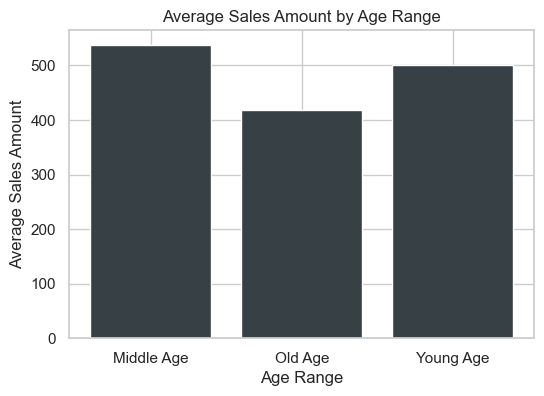

In [81]:
df_3 = new_df.groupby('Age_Group')['SalesAmount'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(df_3['Age_Group'], df_3['SalesAmount'], color='#374045')

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount by Age Range')

# Displaying the plot
plt.show()


### Yearly income range and purchase correlation

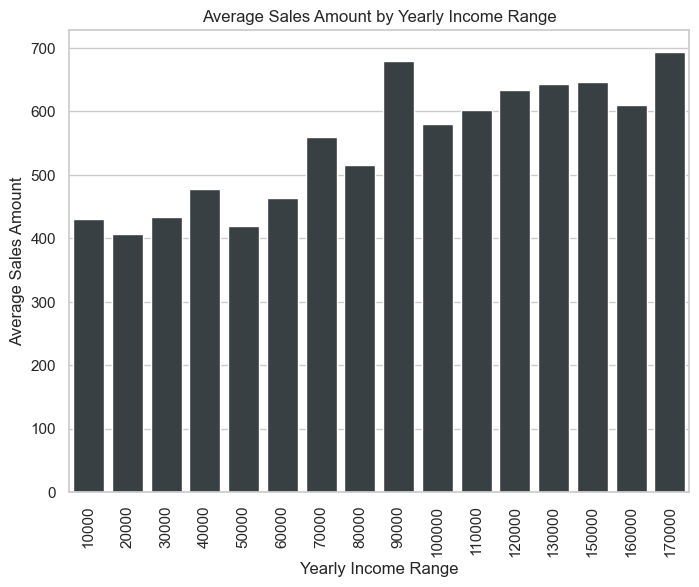

In [82]:
df_income = new_df.groupby('YearlyIncome')['SalesAmount'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='YearlyIncome', y='SalesAmount', data=df_income, color='#374045')
plt.xlabel('Yearly Income Range')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount by Yearly Income Range')
plt.xticks(rotation='vertical')
plt.show()


In [83]:
def create_bins(lower_bound, width, quantity):
    """ 
    create_bins returns an equal-width (distance) partitioning. 
    It returns an ascending list of tuples, representing the intervals.
    """
    bins = [(low, low + width) for low in range(lower_bound, lower_bound + quantity * width + 1, width)]
    return bins


In [84]:
# Define the bins using the create_bins function
bins = create_bins(lower_bound=10000, width=30000, quantity=5)

# Convert the bins to an IntervalIndex
bins2 = pd.IntervalIndex.from_tuples(bins)

# Create a new column 'salary_range' in the DataFrame df using pd.cut
new_df['salary_range'] = pd.cut(new_df['YearlyIncome'], bins2)

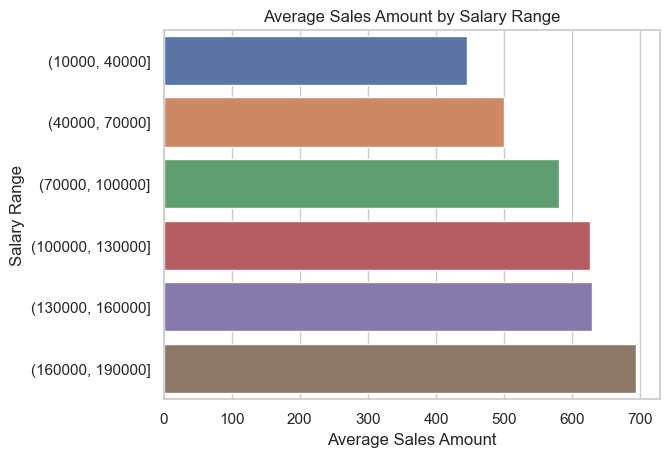

In [85]:
# Grouping by 'salary_range' and calculating the mean of 'SalesAmount'
df_4 = new_df.groupby('salary_range')['SalesAmount'].mean().reset_index()

# Plotting the bar chart
sns.barplot(x="SalesAmount", y="salary_range", data=df_4)

# Adding labels and title
plt.xlabel('Average Sales Amount')
plt.ylabel('Salary Range')
plt.title('Average Sales Amount by Salary Range')

# Displaying the plot
plt.show()

- High salary range leads to increase in purchase

# Customer Segmentation

RFM stands for Recency, Frequency, and Monetary Value. It is a method used for analyzing customer value based on their transaction history. Here's a brief overview:

1. **Recency (R)**: Measures how recently a customer has made a purchase. Customers who have made a purchase more recently are generally considered more valuable.
  
2. **Frequency (F)**: Measures how often a customer makes a purchase. Customers who make purchases more frequently are likely to be more engaged and loyal.
  
3. **Monetary Value (M)**: Measures how much money a customer spends. Customers who spend more money per transaction are typically more valuable to the business.

RFM analysis involves segmenting customers into different groups based on these three metrics to understand their behavior and tailor marketing strategies accordingly.

In [99]:
#  calculating recency for customers who had made a purchase with a company

df_recency = new_df.groupby(by='FullName',
                        as_index=False)['OrderDate'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)

df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,"Adams, Aaron",2016-04-30,244
1,"Adams, Adam",2016-12-15,15
2,"Adams, Alex",2016-08-26,126
3,"Adams, Alexandra",2014-07-03,911
4,"Adams, Allison",2016-10-08,83


In [100]:
#  calculating the frequency of frequent transactions of the
#  customer in ordering/buying some product from the company.

frequency_df = new_df.drop_duplicates().groupby(
    by=['FullName'], as_index=False)['OrderDate'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,"Adams, Aaron",4
1,"Adams, Adam",2
2,"Adams, Alex",2
3,"Adams, Alexandra",1
4,"Adams, Allison",3


In [101]:
monetary_df = new_df.groupby(by='FullName', as_index=False)['SalesAmount'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,"Adams, Aaron",117.96
1,"Adams, Adam",141.98
2,"Adams, Alex",1735.98
3,"Adams, Alexandra",3578.27
4,"Adams, Allison",1602.47


In [102]:
# merging dataset
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,"Adams, Aaron",244,4,117.96
1,"Adams, Adam",15,2,141.98
2,"Adams, Alex",126,2,1735.98
3,"Adams, Alexandra",911,1,3578.27
4,"Adams, Allison",83,3,1602.47


In [103]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,"Adams, Aaron",244,4,117.96,23.629474,73.803117,73.803117
1,"Adams, Adam",15,2,141.98,93.757193,27.304070,27.304070
2,"Adams, Alex",126,2,1735.98,55.918596,27.304070,27.304070
3,"Adams, Alexandra",911,1,3578.27,1.004912,6.802893,6.802893
4,"Adams, Allison",83,3,1602.47,68.861754,53.534589,53.534589


In [145]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,"Adams, Aaron",3.31
1,"Adams, Adam",1.86
2,"Adams, Alex",1.58
3,"Adams, Alexandra",0.30
4,"Adams, Allison",2.79
5,"Adams, Amanda",4.32
6,"Adams, Amber",4.19


In [146]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,"Adams, Aaron",3.31,Medium Value Customer
1,"Adams, Adam",1.86,Low Value Customers
2,"Adams, Alex",1.58,Lost Customers
3,"Adams, Alexandra",0.30,Lost Customers
4,"Adams, Allison",2.79,Low Value Customers
5,"Adams, Amanda",4.32,High value Customer
6,"Adams, Amber",4.19,High value Customer
7,"Adams, Andrea",2.79,Low Value Customers
8,"Adams, Angel",2.59,Low Value Customers
9,"Adams, Bailey",3.32,Medium Value Customer


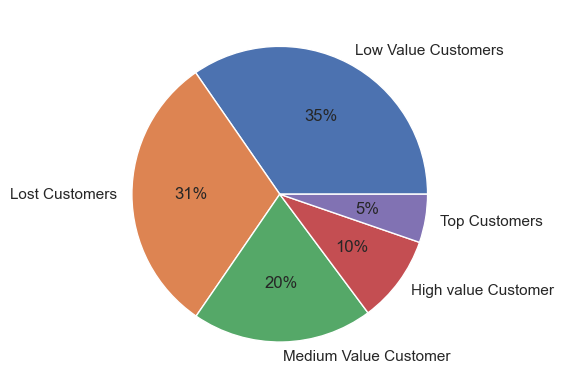

In [147]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

- According to the customer segmentation described above, approximately **15% of our clients are high value clients**, whereas the **majority of our clientele are low value and lost clients**

In [133]:
rfm_df['score'] = ((rfm_df['R_rank_norm']+rfm_df['F_rank_norm']+rfm_df['M_rank_norm'])/300)*100
rfm_df[['CustomerName', 'score']].head(7)

,CustomerName,score
0,"Adams, Aaron",57.076667
1,"Adams, Adam",49.453333
2,"Adams, Alex",36.840000
3,"Adams, Alexandra",4.866667
4,"Adams, Allison",58.640000
5,"Adams, Amanda",86.473333
6,"Adams, Amber",80.810000


In [140]:
rfm_df.score.nunique()

2867


In [154]:
rfm_df["segment"] = np.where(rfm_df['score'] >
                                      90, "Top Customers",
                                      (np.where(
                                        rfm_df['score'] > 80,
                                        "High value Customer",
                                        (np.where(
                                            rfm_df['score'] > 60,
                                            "Medium Value Customer",
                             np.where(rfm_df['score'] > 25,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'score', 'segment']].head(20)

,CustomerName,score,segment
0,"Adams, Aaron",57.08,Low Value Customers
1,"Adams, Adam",49.45,Low Value Customers
2,"Adams, Alex",36.84,Low Value Customers
3,"Adams, Alexandra",4.87,Lost Customers
4,"Adams, Allison",58.64,Low Value Customers
5,"Adams, Amanda",86.47,High value Customer
6,"Adams, Amber",80.81,High value Customer
7,"Adams, Andrea",58.52,Low Value Customers
8,"Adams, Angel",49.89,Low Value Customers
9,"Adams, Bailey",57.42,Low Value Customers


In [155]:
rfm_df.segment.value_counts()

Low Value Customers      8682
Medium Value Customer    4368
Lost Customers           2815
High value Customer      1333
Top Customers             640
Name: segment, dtype: int64

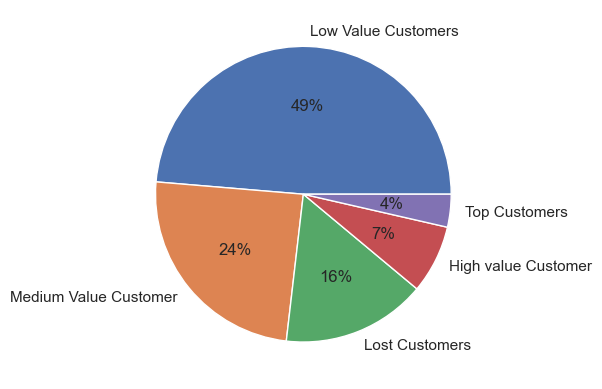

In [156]:
plt.pie(rfm_df.segment.value_counts(),
        labels=rfm_df.segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

#### According to the customer segmentation described above, approximately 11% of our clients are high-valueclients, whereas the majority of our clientele are low value and lost clients.

#### Cohort Analysis

In [94]:
import datetime as dt

In [95]:
# create an invoice month

# Function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)

# apply the function
new_df['InvoiceMonth'] = new_df['OrderDate'].apply(get_month)
# create a column index with the minimum invoice date aka first time customer was aquired
new_df['CohortMonth'] = new_df.groupby('CustomerKey')['InvoiceMonth'].transform('min')

In [96]:
# create a date element function to get a series for subtranction
def get_date_elements(data,column):
    day = data[column].dt.day
    month = data[column].dt.month
    year = data[column].dt.year
    return day, month, year

In [97]:
# get date elements for our cohort and invoice columns(one dimentional Series)
_, Invoice_month, Invoice_year = get_date_elements(new_df, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(new_df, 'CohortMonth')

# create a cohort index
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
new_df['CohortIndex'] = year_diff*12+month_diff+1

# count the customer ID by grouping by Cohort Month and Cohort index
cohort_data = new_df.groupby(['CohortMonth','CohortIndex'])['CustomerKey'].apply(pd.Series.nunique).reset_index()

# create pivot table
cohort_table = cohort_data.pivot(index='CohortMonth', columns=['CohortIndex'],values='CustomerKey')

# change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

# cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

In [141]:
new_df

,ProductKey,OrderDate,ShipDate,CustomerKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,ProductName,SubCategory,Category,StandardCost,ListPrice,ProductLine,ModelName,StartDate,Region,Country,Sale_year,Sale_month,Sale_day,Sale_week,Sale_day_name,Total_Amount,Profit,Age,Age_Group,salary_range,InvoiceMonth,CohortMonth,CohortIndex
0,310,2014-01-01,2014-01-08,21768,6,SO43697,1,2,1789.1350,2171.2942,3578.2700,286.2616,"Watson, Cole",1946-08-22,S,M,70000,5,0,Bachelors,Management,1,3,2014-01-01,10+ Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.2700,Road,Road-150,2005-07-01,Canada,Canada,2014,1,1,2,Wednesday,3864.5316,1406.9758,68,Old Age,"(40000, 70000]",2014-01-01,2014-01-01,1
1,310,2014-01-30,2014-02-06,21727,6,SO43833,1,4,894.5675,2171.2942,3578.2700,286.2616,"Flores, Arianna",1973-06-24,M,F,40000,0,0,Graduate Degree,Skilled Manual,1,0,2014-01-30,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.2700,Road,Road-150,2005-07-01,Canada,Canada,2014,1,30,3,Thursday,3864.5316,1406.9758,41,Middle Age,"(10000, 40000]",2014-01-01,2014-01-01,1
2,310,2014-02-23,2014-02-28,21921,6,SO44027,1,1,3578.2700,2171.2942,3578.2700,286.2616,"Collins, Lucas",1961-08-02,M,M,60000,1,0,Partial College,Skilled Manual,1,1,2014-02-23,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.2700,Road,Road-150,2005-07-01,Canada,Canada,2014,2,23,6,Sunday,3864.5316,1406.9758,53,Middle Age,"(40000, 70000]",2014-02-01,2014-02-01,1
3,310,2014-02-28,2014-03-06,22050,6,SO44064,1,1,3578.2700,2171.2942,3578.2700,286.2616,"Bailey, Richard",1968-02-18,S,M,90000,4,4,Bachelors,Management,1,1,2014-02-28,1-2 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.2700,Road,Road-150,2005-07-01,Canada,Canada,2014,2,28,4,Friday,3864.5316,1406.9758,46,Middle Age,"(70000, 100000]",2014-02-01,2014-02-01,1
4,310,2014-05-18,2014-05-25,22233,6,SO44677,1,2,1789.1350,2171.2942,3578.2700,286.2616,"Martin, Xavier",1972-04-22,M,M,50000,1,1,Graduate Degree,Skilled Manual,1,0,2014-05-18,0-1 Miles,"Road-150 Red, 62",Road Bikes,Bikes,2171.2942,3578.2700,Road,Road-150,2005-07-01,Canada,Canada,2014,5,18,6,Sunday,3864.5316,1406.9758,42,Middle Age,"(40000, 70000]",2014-05-01,2014-05-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58184,485,2016-12-19,2016-12-26,15324,2,SO73288,2,1,21.9800,8.2205,21.9800,1.7584,"Serrano, Renee",1948-05-21,M,F,40000,2,1,High School,Professional,0,2,2016-12-19,2-5 Miles,Fender Set - Mountain,Fenders,Accessories,8.2205,21.9800,Mountain,Fender Set - Mountain,2007-07-01,Northeast,United States,2016,12,19,0,Monday,23.7384,13.7595,68,Old Age,"(10000, 40000]",2016-12-01,2016-12-01,1
58185,465,2016-06-30,2016-07-07,12956,2,SO61146,4,1,24.4900,9.1593,24.4900,1.9592,"Sun, Marshall",1962-03-11,S,M,70000,1,0,Bachelors,Professional,1,1,2016-06-30,2-5 Miles,"Half-Finger Gloves, M",Gloves,Clothing,9.1593,24.4900,Sport,Half-Finger Gloves,2007-07-01,Northeast,United States,2016,6,30,3,Thursday,26.4492,15.3307,54,Middle Age,"(40000, 70000]",2016-06-01,2016-06-01,1
58186,580,2016-05-23,2016-05-30,17120,2,SO58451,1,2,850.4950,1082.5100,1700.9900,136.0792,"Raje, Michele",1966-05-16,S,F,60000,0,0,Graduate Degree,Skilled Manual,1,0,2016-05-23,1-2 Miles,"Road-350-W Yellow, 40",Road Bikes,Bikes,1082.5100,1700.9900,Road,Road-350-W,2007-07-01,Northeast,United States,2016,5,23,0,Monday,1837.0692,618.4800,50,Middle Age,"(40000, 70000]",2016-05-01,2016-05-01,1
58187,473,2016-08-16,2016-08-23,11732,2,SO64253,2,4,15.8750,23.7490,63.5000,5.0800,"Sanchez, Erick",1959-02-08,M,M,60000,1,0,Partial College,Skilled Manual,1,1,2016-06-11,2-5 Miles,"Classic Vest, L",Vests,Clothing,23.7490,63

<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

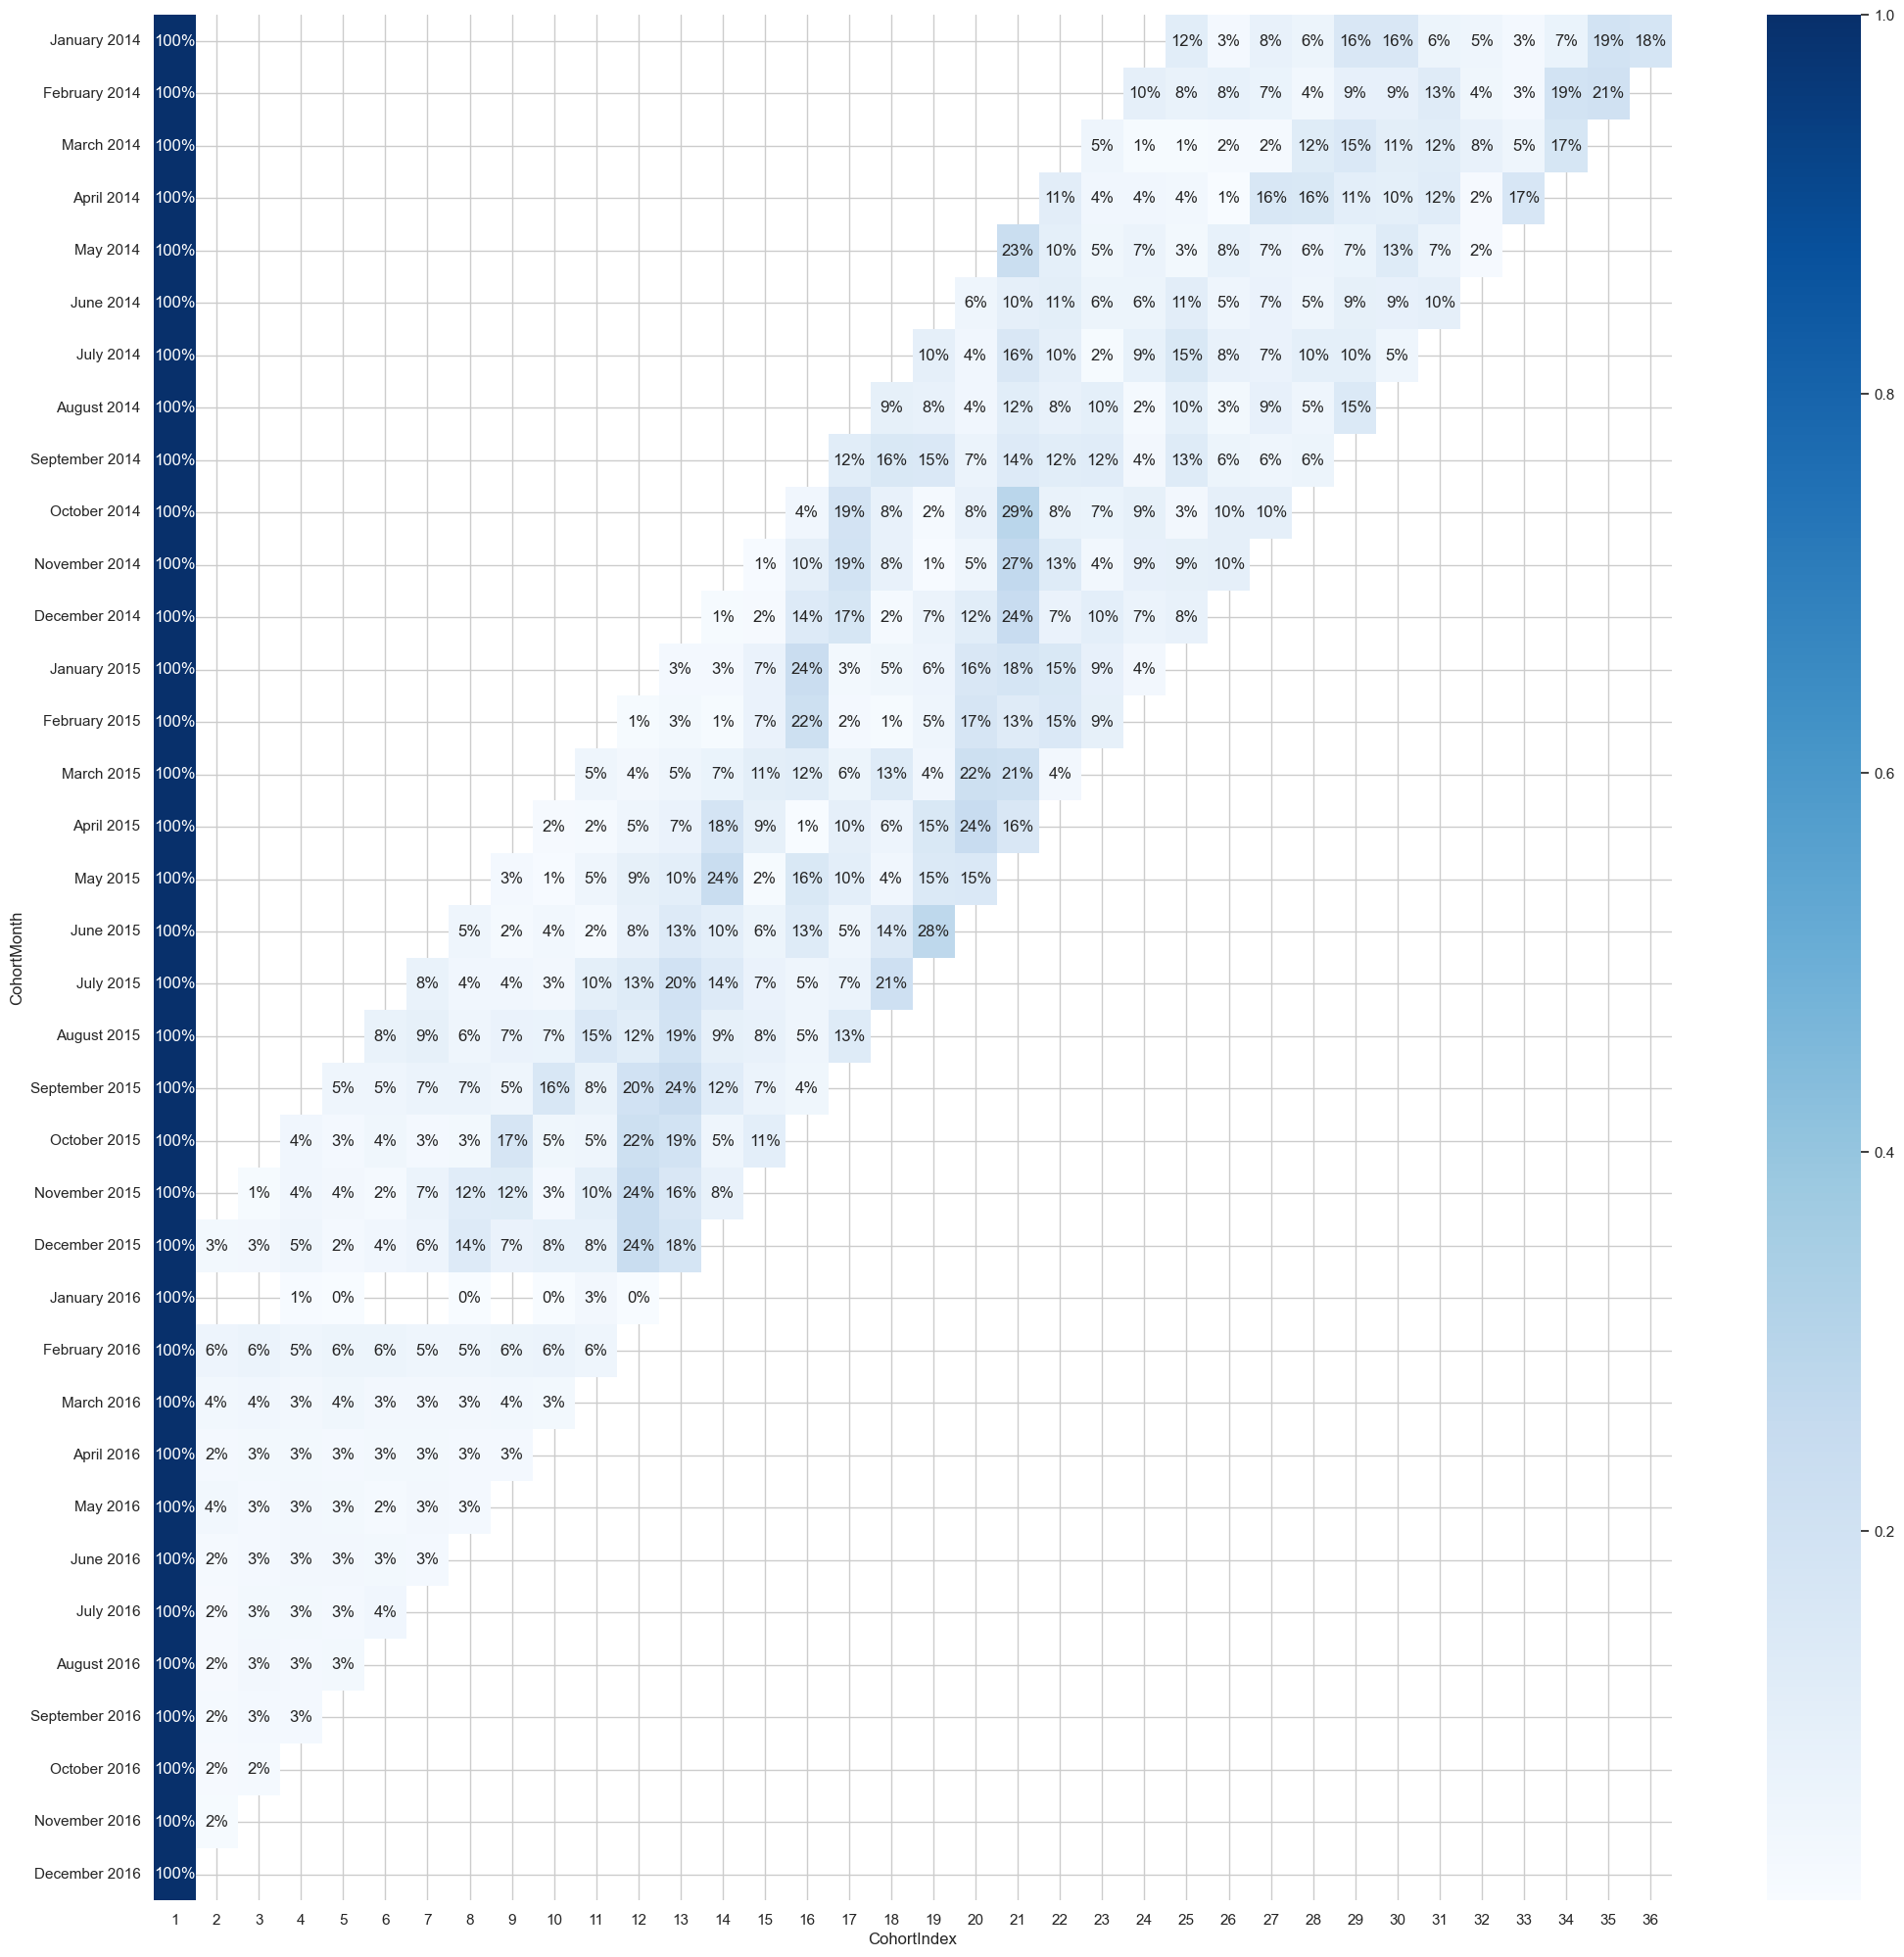

In [98]:
# create percentages
plt.figure(figsize=(25,25))
sns.heatmap(new_cohort_table, annot=True, cmap='Blues',fmt='.0%')

- From the heatmap client retention in 2014 was subpar
- Since August of 2015, we have noticed some customers returning, though not in large numbers
- 2016 brought about a slight improvement in retention